In [1]:
import cv2
from matplotlib import pyplot as plt
import mask_align

# load masks to align

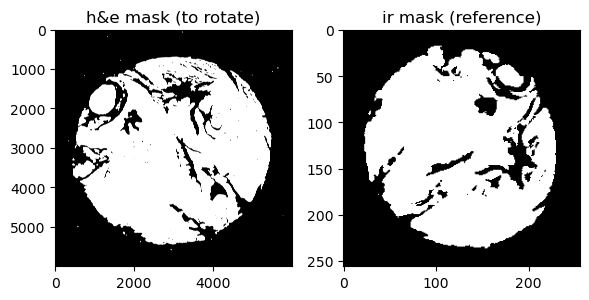

In [2]:
he_mask = cv2.imread(r'C:/Users/w37262do/Datasets/pcuk_2023/H_E_segmented_tissuemasks/Slide 2/C-4.jpg') / 255.0
ir_mask = cv2.imread(r'D:/datasets/pcuk2023_ftir_whole_core/mask/s02_c065.png') / 255.0

fig,ax = plt.subplots(1,2,figsize=(6,3))
ax[0].imshow(he_mask,cmap='grey'); ax[0].set_title("h&e mask (to rotate)")
ax[1].imshow(ir_mask,cmap='grey'); ax[1].set_title("ir mask (reference)") 
fig.tight_layout()

## Transform left mask to fit reference

In [3]:
aligned,affine_matrix = mask_align.align_masks(he_mask,ir_mask)
print(affine_matrix)

[[ 0.0129858   0.98147792 -0.00860649]
 [-0.98155475  0.0431118   0.01449387]
 [ 0.          0.          1.        ]]


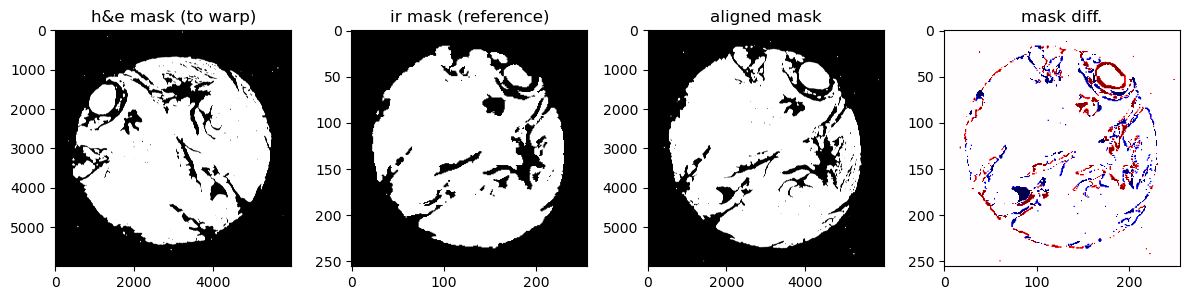

In [4]:
fig,ax = plt.subplots(1,4,figsize=(12,3))
ax[0].imshow(he_mask,cmap='grey'); ax[0].set_title("h&e mask (to warp)")
ax[1].imshow(ir_mask,cmap='grey'); ax[1].set_title("ir mask (reference)") 
ax[2].imshow(aligned,cmap='grey'); ax[2].set_title("aligned mask")
ax[3].imshow(cv2.resize(aligned,(ir_mask.shape[1],ir_mask.shape[0]))-ir_mask[...,0],cmap='seismic'); ax[3].set_title("mask diff.")
fig.tight_layout()